# Foundamentals: solving the Poisson equation

We solve the Poisson equation.

\begin{align}
-\boldsymbol{\nabla}^{2}u(\boldsymbol{x}) & =f(\boldsymbol{x}), & \boldsymbol{x}\mbox{ in }\Omega\\
u(\boldsymbol{x}) & =u_{D}(\boldsymbol{x}), & \boldsymbol{x}\mbox{ on }\partial\Omega
\end{align}

Here, $u=u(\boldsymbol{x})$ is the unknown function, $f=f(\boldsymbol{x})$ is a prescribed function, $\boldsymbol{\nabla}^2$ is the Laplace operator (often written as $\Delta$), $\Omega$ is the spatial domain, and $\partial \Omega$ is the boundary of $\Omega$. 

The Poisson problem above is an example of a boundary-value problem. In two space dimensions with coordinates $x$ and $y$, we can write out the Poisson equation as
\begin{equation}
-\frac{\partial^2 u}{\partial x^2}-\frac{\partial^2 u}{\partial y^2} = f(x,y).
\end{equation}
The unknown $u$ is now a function of two variables, $u=u(x,y)$, defined over a two-dimensional domain $\Omega$.

The Poisson equation arises in numerous physical contexts, including heat conduction, electrostatics, diffusion of substances, twisting of elastic rods, inviscid fluid flow, and water waves. Moreover, the equation appears in numerical splitting strategies for more complicated systems of PDEs, in particular the Navier–Stokes equations.


## Variational formulation

The finite element method (FEM) is a variational method. More specifically, it is a *weighted residual method*. In other words, instead of requiring the PDE to be satisfied exactly everywhere in $\Omega$, we require to be satisfied in a weighted sense, given by the *variational form*:
$$
\begin{equation}
-\int_\Omega (\boldsymbol{\nabla}^{2}u) v\ \mathrm{d}\boldsymbol{x} = \int_\Omega f(x) v\ \mathrm{d}\boldsymbol{x},
\end{equation}
$$
for all the *test functions* (or *weight functions*) $v$ in a space $\mathcal{V}$, and
$\mathrm{d}\boldsymbol{x}$ denotes the area and volume measures in 2-D and 3-D, respectively.

### Integration by parts
One advantage of variational forms is that we can reducing its order using integration by parts. In particular, 
$$
\begin{equation}
\int_\Omega -(\boldsymbol{\nabla}^{2}u) v\ \mathrm{d}\boldsymbol{x} = \int_\Omega -\boldsymbol{\nabla} u \cdot \boldsymbol{\nabla} v\ \mathrm{d}\boldsymbol{x} + \int_\Omega \frac{\partial u}{\partial \boldsymbol{n}}  v\ \mathrm{d}\boldsymbol{s},
\end{equation}
$$
where $\dfrac{\partial u}{\partial \boldsymbol{n}} = \boldsymbol{\nabla} u \cdot \boldsymbol{n}$ is the derivative of $u$ in the outward normal direction $\boldsymbol{n}$ on the boundary, and $\mathrm{d}\boldsymbol{s}$ is a measure of surface area.

If $v$ is chosen such that it vanishes along the boundary, i.e. $v(\boldsymbol{x})$ for each point $(\boldsymbol{x})$ on $\partial \Omega$, then the second term in the right-hand side is equal to $0$. Substituting the first term into the variational form, we then obtain
$$
\begin{equation}
\int_\Omega \boldsymbol{\nabla} u \cdot \boldsymbol{\nabla} v\ \mathrm{d}\boldsymbol{x} = \int_\Omega f(x) v\ \mathrm{d}\boldsymbol{x}.
\end{equation}
$$
This is known as the *weak form* of the original PDE. 

### Trial functions
To convert the weak form into an algebraic equation, we express $u$ as a linear combination of another set of functions $\phi_i$, i.e., $u=\sum_{i=1}^n{u_i}{\phi_i}$. Then there are $n$ unknowns, $u_1, u_2, \dots, u_n$. For scalar equations with $n$ degrees of freedom, we then need $n$ test functions to obtain $n$ equations for $n$ unknowns.

The basis functions $\phi_i$ are also called the *trial functions*. The spaces spanned by the $\phi_i$ and by the $v_i$ are called the *trial space* and *test space*, respectively.

## A model problem

Here we construct a model problem with the exact solution. 
$$u_e(x,y)=1+x^2+2y^2$$

Therefore, 
$$f(x,y)=−6,$$
with Dirichlet boundary condition
$$u_D(x,y)=u_e(x,y)=1+x^2+2y^2.$$
 
 We will demonstrate how to use FEniCS to solve this problem on a unit square.

## Import packages

We start by importing `fenics` (Note that older example codes import `dolfin` instead of `fenics`). This would import the key classes `UnitSquareMesh`, `FunctionSpace`, `Function`, etc. All FEniCS programs for solving PDEs by the finite element method normally start with this line.

In addition, we also import `matplotlib` for plotting, and use the command `%matplotlib inline` to plot the result in the Notebook.

In [1]:
from fenics import *
%matplotlib inline

## Generating a mesh

Next, we generate a simple triangular mesh over the unit square $[0,1]×[0,1]$, by dividing 8x8 squares. The number of nodes are $9\cdot 9 =81$, and the number of triangles is $8\cdot 8\cdot 2=128$.

The following statements generate and plots the mesh. In the Notebook, the mesh will be plotted inline. 

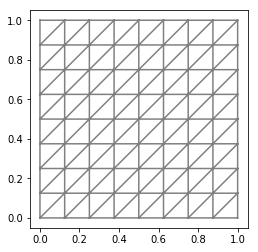

In [2]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
plot(mesh)

Note: When running in an interactive environment outside of Jupyter Notebook, you may need to call 
```
matplotlib.pyplot.show()
```
in order to display the plot.

## Defining function space

We define a finite element function space. The second argument 'P' specifies the type of element. The type of element here is $P$, implying the standard Lagrange family of elements. You may also use 'Lagrange' of 'CG' to specify this type of element. The argument can also be 'DG' for discontinuous Galerkin methods.

The third argument specifies the degree of the functions. Here, the functions are piecewise linear.

In [3]:
V = FunctionSpace(mesh, 'P', 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Note: As of version 2016.2, FEniCS support all simplex elements in 1-D, 2-D and 3-D up to cubic elements, as those shown in the [Periodic Table of the Finite Elements]( https://www.femtable.org/). However, there is no support for quadrilateral or hexahedral elements yet.

## Specifying trial and test functions

In the Galerkin methods, the trial and test functions belong to the same function space.

In [4]:
u = TrialFunction(V)
v = TestFunction(V)

## Defining the variational problem

We need to specify the variational problem
$$\int_\Omega \boldsymbol{\nabla} u \cdot \boldsymbol{\nabla} v\ \mathrm{d}\boldsymbol{x} = \int_\Omega f(x) v\ \mathrm{d}\boldsymbol{x}.$$

In FEniCS, the variational form is specified by translating the mathematical expressions of the integrands into a [Unified Form Language (UFL)](http://fenics.readthedocs.io/projects/ufl/en/latest/manual/form_language.html), which is a domain-specific language based on Python and C++ syntax.

In [5]:
# Define variational problem
a = dot(grad(u), grad(v))*dx

f = Constant(-6.0)
L = f*v*dx

Here, `a` is the integrand on the left-hand side, `L` is the integrand on the right-hand side, `dx` denotes the measure. Since `Constant(-6.0)` defines a constant expression. Another way to write it is 

```f = Expression('-6', degree=0)```

The  UFL is an integral part of FEniCS. An interesting feature of FEniCS is that it performs just-in-time (JIT) to translate the UFL into C++ code.

## Defining boundary conditions

The Poison equations do not have a unique solution  without proper boundary conditions. Next, we need to specify the boundary condition $u=D_u$ on $\partial \Omega$. We need to define an expression for $D_u$ and a function to indicate whether a point is on $\partial \Omega$.

For our specific model problem, $u_D = 1+x^2+2y^2$. The UFL specification uses a character string containing an expression in C++ syntax. In particular, $x$ and $y$ coordinates will be denoted as `x[0]` and `x[1]`. In 3D, the $z$ coordinate will be denoted as `x[2]`.

In [6]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

--- Instant: compiling ---


We set the degree to 2 so that `u_D` may represent the exact quadratic solution to our test problem.

We also need to define an indicator to determine whether a point is on the Dirichlet boundary, and then specify the boundary condition.

In [7]:
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

At input, `on_boundary` specifies whether a node is on the physical boundary. We will show how to define more complicated boundary conditions in later examples.

## Forming and solving the linear system

We are now ready to solve the PDE using the solve function.

In [8]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


We can also explicitly form the linear system and solve it instead.
```
A, b = assemble_system(a, L, bc)
solve(A, u.vector(), b)
```
This may be useful if we need to modify the matrix and vector, or export them to files.

## Post processing
We can then plot the solution and the mesh together for inspection:

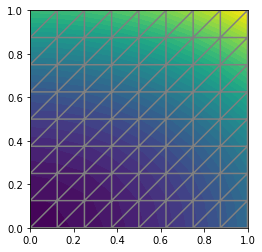

In [9]:
# Plot solution and mesh
plot(u)
plot(mesh)

We can also save the result into a VTK file for more advanced visualization and post-processing using [ParaView](https://www.paraview.org/) (recommended for FEniCS), [VisIt](https://visit.llnl.gov/), etc.

In [10]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

In FEniCS, it is easy to perform some error analysis.

In [11]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
  Ignoring precision in integral metadata compiled using quadrature representation. Not implemented.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
error_L2  = 0.008235098073354806
error_max = 1.33226762955e-15


## More on expressions

Note that the expression must be a valid C++ expression. It is similar to Python expressions, except that the power operator `**` has no direct correspondence in C++. You must write `x**p` as `pow(x, p)`. 

Any functions declared in the C++  header file `cmath` can be used in the C++ expression, such as `cos`, `acos`, `cosh`, `exp`,  `log`, `modf`, `sqrt`, `ceil`, `fabs`, etc.

There cannot be `if` branches in the expression. However, one can use the inline branching (the ? and : combination) in C++. For example, the function
$$
f(x,y)=\begin{cases}
x^{2}, & x,y\ge0,\\
2, & \text{otherwise},
\end{cases}
$$
can be implemented as 

In [12]:
f = Expression('x[0]>=0 && x[1]>=0 ? pow(x[0], 2) : 2', degree=2)

--- Instant: compiling ---


Parameters in expression strings are allowed, but must be initialized via keyword arguments when creating the Expression object. 

For example, the function $f(x)=e^{-\kappa \pi ^2 t}\sin(\pi \kappa x)$ can be coded as

In [13]:
f = Expression('exp(-kappa*pow(pi, 2)*t)*sin(pi*k*x[0])', degree=2, kappa=1.0, t=0, k=4)

--- Instant: compiling ---


At any time, parameters can be updated. For example:

In [14]:
f.t += 0.1
f.k = 10

## More on boundary conditions

To specify boundary conditions, we used a user-defined function `boundary` above. This function will be called for every discrete point in the mesh, including the internal points. The argument `on_boundary` is True if `x` is on the physical boundary of the mesh and is False if `x` is inside the domain. This function must return a boolean value. The argument `on_boundary` may be omitted.

You might wonder why we need this function, and why it needs to be called for all the nodes of the mesh. The reason for the first question is that there may be different types of boundary conditions, and there may be different expressions for the same type of boundary conditions. Therefore, the `solve` function can take a list of boundary conditions. An object returned by `DirichletBC` specifies a particular expression of boundary conditions, and the return value of its `boundary` function indicates whether a particular point is associated with this particular expression. For example, 

--- Instant: compiling ---
--- Instant: compiling ---


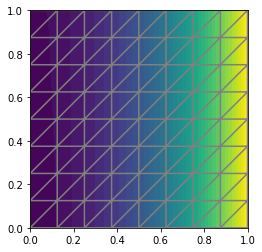

In [15]:
# Note that here we compare the values using a tolerance, instead of 
# compare directly with the exact value to avoid rounding errors.
tol = 1E-14
def left_boundary(x, on_boundary):
    return on_boundary and abs(x[0]) < tol
    
def right_boundary(x, on_boundary):
    return on_boundary and abs(x[0] - 1) < tol

# Note that the argument on_boundary may be omitted
def top_boundary(x):
    return abs(x[1] -1 ) < tol
    
def bottom_boundary(x):
    return abs(x[1]) < tol

u_L = Expression('1 + 2*x[1]*x[1]', degree=2)
bc_L = DirichletBC(V, u_L, left_boundary)

u_R = Expression('0', degree=2)
bc_R = DirichletBC(V, u_R, right_boundary)

bcs = [bc_L, bc_R]

u = Function(V)
solve(a == L, u, bc_R)

plot(u)
plot(mesh)

Regarding the second question, by looping through the internal nodes, it allows the definition of internal boundary, for example when the mesh is composed of subdomains of different materials. See [Subdomains and boundary conditions](https://fenicsproject.org/pub/tutorial/sphinx1/._ftut1005.html) for more detail.

**Acknowledgment**: This notebook was adapted from Chapter 1 of [The FEniCS Tutorial Volume I](https://fenicsproject.org/pub/tutorial/sphinx1/) by Hans Petter Langtangen and Anders Logg, released under CC Attribution 4.0 license.